<a href="https://colab.research.google.com/github/kamrulhasan04947/mlprac/blob/main/Diabetes_and_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
df1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df1.duplicated().sum()

0

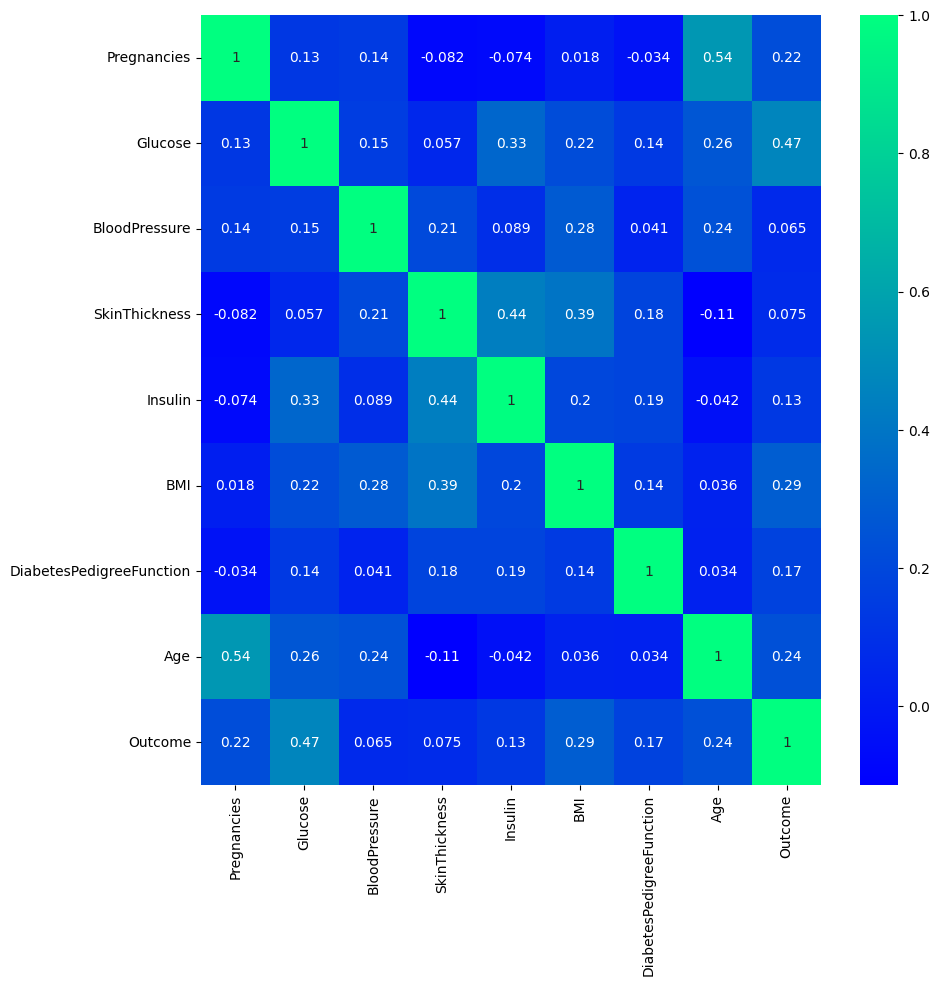

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), annot= True, cmap='winter')
plt.show()

In [ ]:
x1 = df1.drop(['Outcome'], axis=1)
y1 = df1['Outcome']
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=42)
dtfiting = dt.fit(x_train1, y_train1)
dt_pr = dtfiting.predict(x_test1)
dt_sc = classification_report(y_test1, dt_pr)
print(dt_sc)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.58      0.64      0.61        86

    accuracy                           0.72       254
   macro avg       0.69      0.70      0.70       254
weighted avg       0.73      0.72      0.72       254



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier(max_depth=100, random_state=42)
rtfiting = rf.fit(x_train1, y_train1)
rf_pr = rtfiting.predict(x_test1)
rf_sc = classification_report(y_test1, rf_pr)
print(rf_sc)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       168
           1       0.64      0.60      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_fiting = knn.fit(x_train1, y_train1)
knn_pr  = knn_fiting.predict(x_test1)
print(classification_report(y_test1, knn_pr))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       168
           1       0.56      0.56      0.56        86

    accuracy                           0.70       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
nm = StandardScaler()
data_nm = nm.fit_transform(x1)
data = pd.DataFrame(data_nm, columns= x1.columns)

In [ ]:
train_x , test_x, train_y, test_y =train_test_split(data, y1, test_size=0.33, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_fiting = log_reg.fit(train_x, train_y)
log_pr  = log_fiting.predict(test_x)
print(classification_report(test_y, log_pr))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [ ]:
grid_param = {'C': [0.1, 0.01, 0.1, 1, 100],
              'gamma': [1, 0.75, 0.5, 0.25],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), grid_param,  refit=True,  verbose=3)
fitdata =  grid.fit(train_x,  train_y)
fitdata.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.825 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.660 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.718 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.718 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.725 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
svm = SVC(C = 0.1,  gamma= 0.01, kernel='linear', probability=True)
svmmodel = svm.fit(train_x,train_y)
svmmodel_prdict = svmmodel.predict(test_x)
classification_reportsvm = classification_report(test_y, svmmodel_prdict)
print(classification_reportsvm)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.63      0.62      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



**Salary data set**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/salary_data_cleaned.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [ ]:
df2.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [ ]:
df2.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

In [ ]:
df2.duplicated().sum()

275

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
lbenc = LabelEncoder()
lbin = LabelBinarizer()

In [ ]:
for column in df2:
  if len(df2[column].unique()) > 2:
    df2[column] = lbenc.fit_transform(df2[column])
  elif len(df2[column].unique()) == 2:
    df2[column] = lbin.fit_transform(df2[column])

In [ ]:
df2.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,69,180,126,19,294,3,72,6,56,2,...,59,294,25,0,46,1,0,0,0,1
1,106,235,440,15,320,99,12,2,67,7,...,88,320,18,0,35,1,0,0,0,0
2,69,339,213,29,164,42,43,6,93,2,...,83,164,7,1,9,1,0,1,0,1


In [ ]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

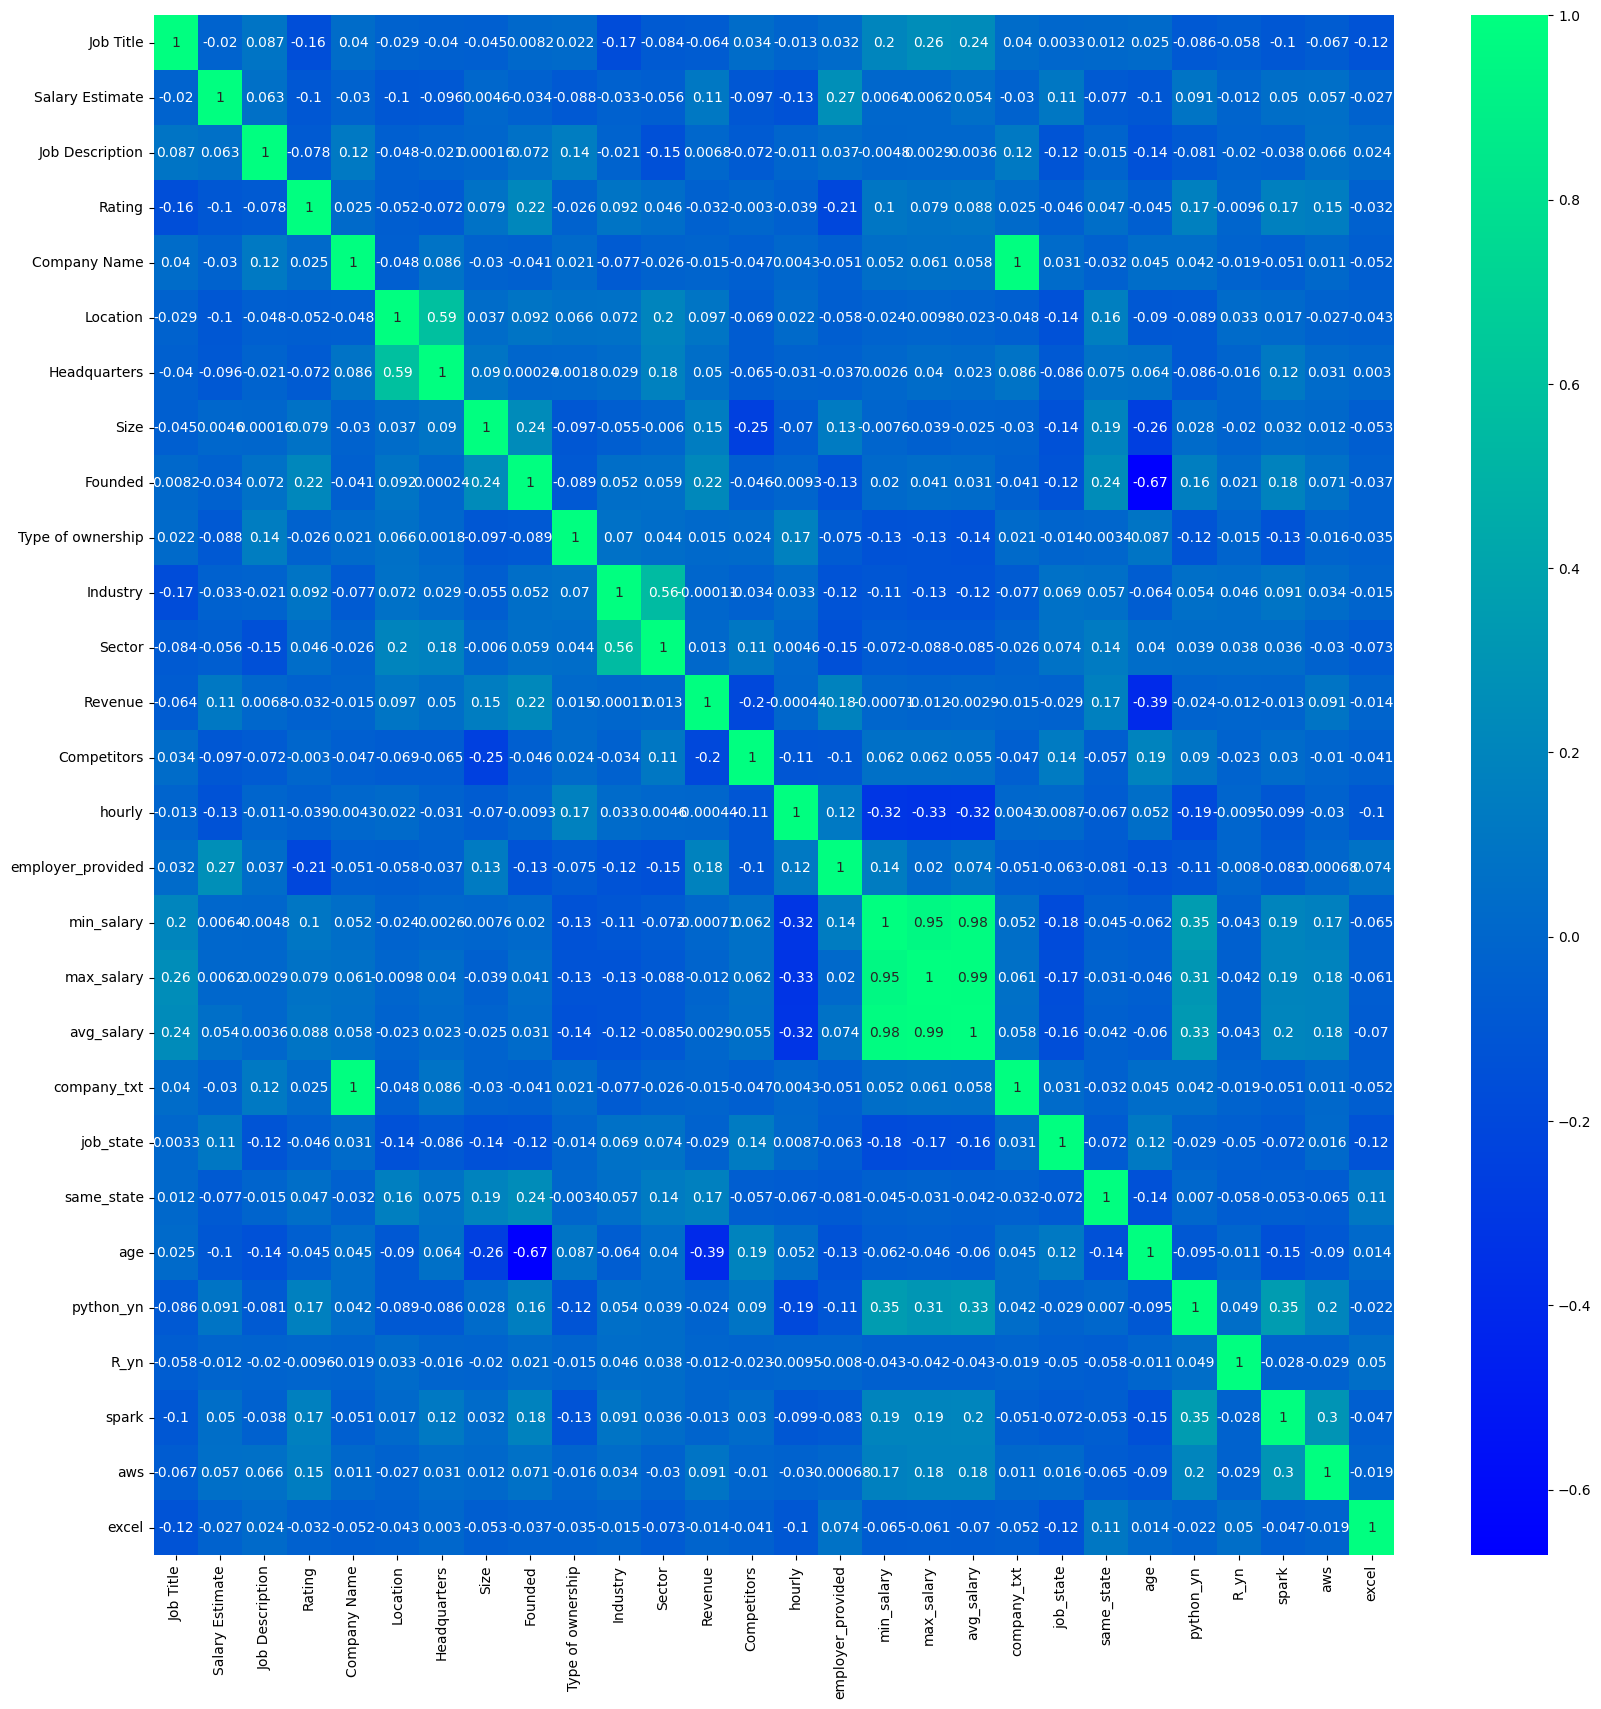

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df2.corr(), annot= True, cmap='winter')
plt.show()

In [ ]:
len(df2.columns)

28

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Job Title,742.0,121.171159,72.332409,0.0,69.0,107.0,191.00,263.0
Salary Estimate,742.0,204.212938,119.482715,0.0,105.0,198.0,307.75,415.0
Job Description,742.0,230.544474,131.892843,0.0,116.0,232.5,340.75,462.0
Rating,742.0,17.615903,6.034263,0.0,14.0,18.0,21.00,30.0
Company Name,742.0,179.402965,95.153931,0.0,105.0,186.0,257.00,342.0
Location,742.0,101.754717,57.635194,0.0,40.0,113.5,158.00,199.0
Headquarters,742.0,103.133423,57.385735,0.0,45.0,117.5,155.75,197.0
Size,742.0,4.208895,1.849471,0.0,3.0,4.0,6.00,8.0
Founded,742.0,60.382749,32.807320,0.0,35.0,71.0,90.00,101.0
Type of ownership,742.0,3.005391,1.804171,0.0,2.0,2.0,3.00,10.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

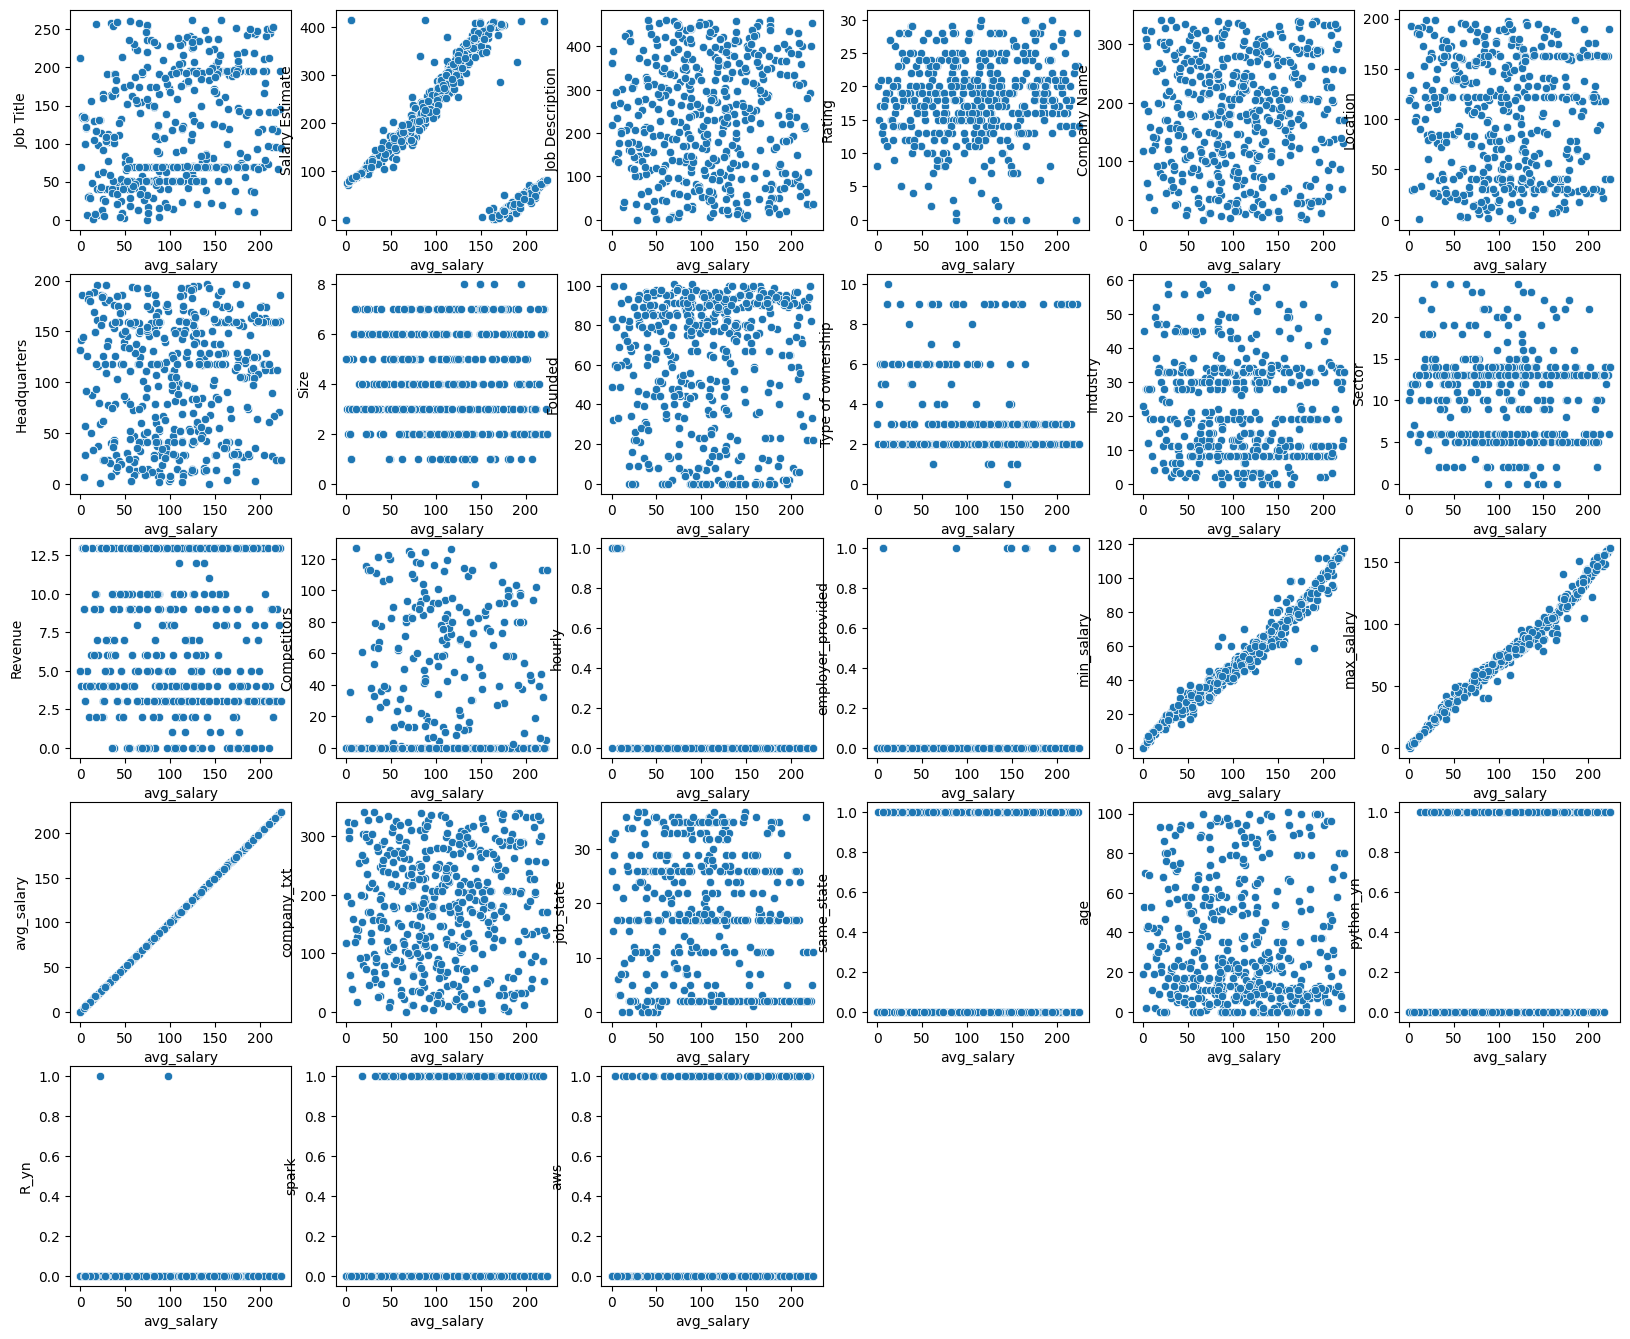

In [ ]:
plt.figure(figsize=(20,20))
plotnum = 1
for col in df2.columns:
  if plotnum < 28:
    ax = plt.subplot(6,6, plotnum)
    sns.scatterplot(data=df2, x=df2.avg_salary, y=df2[col], ax=ax)
  plotnum += 1
plt.show()

In [ ]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [ ]:
df3 = df2[['Job Title', 'Rating', 'min_salary', 'max_salary', 'avg_salary', 'python_yn', 'spark', 'aws']].copy()

In [ ]:
df3.head(3)

,Job Title,Rating,min_salary,max_salary,avg_salary,python_yn,spark,aws
0,69,19,33,41,59,1,0,0
1,106,15,43,61,88,1,0,0
2,69,29,60,40,83,1,1,0


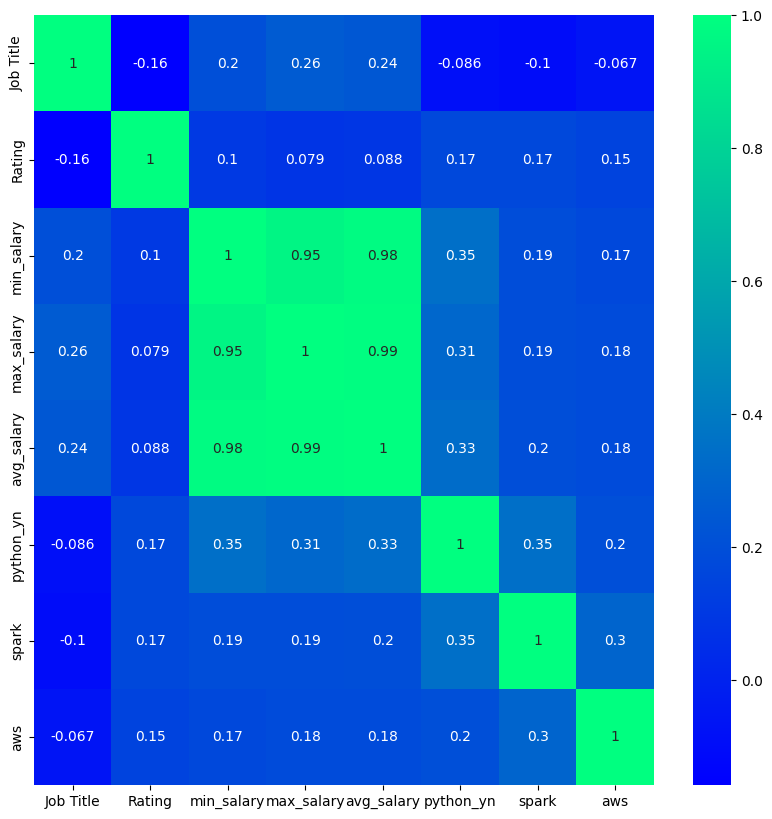

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df3.corr(), annot= True, cmap='winter')
plt.show()

In [ ]:
x = df3.drop(['avg_salary'], axis = 1)
y= df3['avg_salary']
y

0       59
1       88
2       83
3       67
4      140
      ... 
695     86
700     91
716     97
732    133
735     88
Name: avg_salary, Length: 467, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
linear_model = LinearRegression()
fitLinear = linear_model.fit(x_train, y_train)
linmod_pr =  fitLinear.predict(x_test)

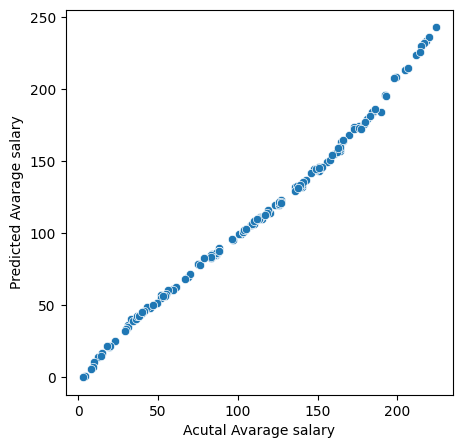

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlabel("Acutal Avarage salary", fontsize=10)
plt.ylabel("Predicted Avarage salary", fontsize=10)
sns.scatterplot(x=y_test, y=linmod_pr, ax=ax)
plt.show()

In [ ]:
linmod_score = r2_score(y_test, linmod_pr)
print(f"R2 Score is :{linmod_score}")

R2 Score is :0.9918872925271817


In [ ]:
linmod_mean_absulat_error = mean_absolute_error(y_test, linmod_pr)
print(f"Mean absulat error :  {linmod_mean_absulat_error}")

Mean absulat error :  4.0495706169440675


In [ ]:
linmod_rootMeansqurederror = np.sqrt(mean_squared_error(y_test, linmod_pr))
print(f"Root Mean Squred Error :  {linmod_mean_absulat_error}")

Root Mean Squred Error :  4.0495706169440675


**Code Using DecisionTreeRegressor**

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtrfiting = dtr.fit(x_train, y_train)
dtr_pr = dtrfiting.predict(x_test)

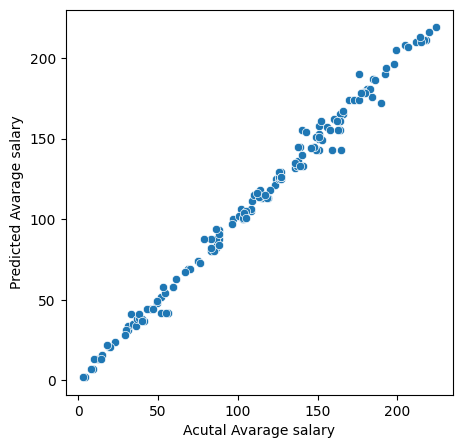

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlabel("Acutal Avarage salary", fontsize=10)
plt.ylabel("Predicted Avarage salary", fontsize=10)
sns.scatterplot(x=y_test, y=dtr_pr, ax=ax)
plt.show()

In [ ]:
dtr_score = r2_score(y_test, dtr_pr)
print(f"R2 Score Decision Tree is  :{dtr_score}")

R2 Score Decision Tree is  :0.9941322716721425


In [ ]:
dtr_mean_absulat_error = mean_absolute_error(y_test, dtr_pr)
print(f"Mean absulat error  Decision Tree  :  {dtr_mean_absulat_error}")

Mean absulat error  Decision Tree  :  1.616326530612245


In [ ]:
dtr_rootMeansqurederror = np.sqrt(mean_squared_error(y_test, dtr_pr))
print(f"Root Mean Squred Error  Decision Tree :  {dtr_mean_absulat_error}")

Root Mean Squred Error  Decision Tree :  1.616326530612245


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dtr_treegraph = export_graphviz(dtrfiting)
dtr_treegraph
# paste the contents of the file to webgraphviz.com tree wii ganarat.

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[3] <= 76.5\\nsquared_error = 3417.227\\nsamples = 497\\nvalue = 106.308"] ;\n1 [label="x[3] <= 40.5\\nsquared_error = 1084.312\\nsamples = 275\\nvalue = 62.251"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[3] <= 19.5\\nsquared_error = 237.966\\nsamples = 108\\nvalue = 27.343"] ;\n1 -> 2 ;\n3 [label="x[2] <= 10.5\\nsquared_error = 59.234\\nsamples = 50\\nvalue = 13.08"] ;\n2 -> 3 ;\n4 [label="x[3] <= 5.5\\nsquared_error = 11.71\\nsamples = 26\\nvalue = 6.538"] ;\n3 -> 4 ;\n5 [label="x[2] <= 1.5\\nsquared_error = 3.835\\nsamples = 11\\nvalue = 3.273"] ;\n4 -> 5 ;\n6 [label="x[2] <= 0.5\\nsquared_error = 0.222\\nsamples = 3\\nvalue = 0.333"] ;\n5 -> 6 ;\n7 [label="squared_error = 0.0\\nsamples = 2\\nvalue = 0.0"] ;\n6 -> 7 ;\n8 [label="squared_error = 0.0\\nsamples = 1\\nvalue = 1.0"] ;\n6 -> 8 ;\n9 [label="x[3] <= 3.5\\nsquared_error = 0.734\\nsamples = 

**Code Using RandomforestRegrasor**

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfrfiting = dtr.fit(x_train, y_train)
rfr_pr = dtrfiting.predict(x_test)

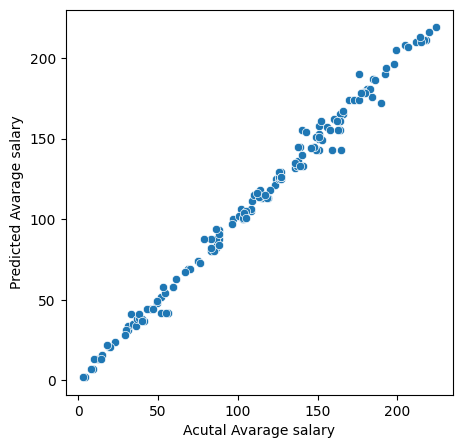

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlabel("Acutal Avarage salary", fontsize=10)
plt.ylabel("Predicted Avarage salary", fontsize=10)
sns.scatterplot(x=y_test, y=rfr_pr, ax=ax)
plt.show()

In [ ]:
rfr_score = r2_score(y_test, rfr_pr)
print(f"R2 Score RandomForestRegressor is  :{rfr_score}")

R2 Score RandomForestRegressor is  :0.9921693178783649


In [ ]:
rfr_mean_absulat_error = mean_absolute_error(y_test, rfr_pr)
print(f"Mean absulat error  RandomForestRegressor :  {rfr_mean_absulat_error }")

Mean absulat error  RandomForestRegressor :  3.425806451612903


In [ ]:
rfr_rootMeansqurederror = np.sqrt(mean_squared_error(y_test, rfr_pr))
print(f"Root Mean Squred ErrorRandomForestRegressor :  {rfr_rootMeansqurederror}")

Root Mean Squred ErrorRandomForestRegressor :  5.0933226369307265


**applying mlr**